# Treinamento do Joaquim: DS Novato

In [1]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import metrics as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados sintéticos

In [14]:
n_samples=20000
n_features=2
n_informative=2
n_redundant=0
random_state=0
#dataset
X, y = ds.make_classification( n_samples=n_samples,
                               n_features=n_features,
                               n_informative=n_informative,
                               n_redundant=n_redundant,
                               random_state=random_state )

# Sem separação dos dados

In [15]:
#production dataset
X_train, X_prod, y_train, y_prod = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)
# define model
dtc = tr.DecisionTreeClassifier( max_depth=38 )
# fit
dtc.fit(X_train, y_train)
# predction
y_pred = dtc.predict(X_train)
# accuracy
acc = mt.accuracy_score(y_train, y_pred)
print('Accuracy Over Training: {}'.format(acc))

Accuracy Over Training: 1.0


## Publicando do modelo em produção

In [16]:
y_pred = dtc.predict( X_prod )
acc = mt.accuracy_score(y_prod, y_pred)
print('Accuracy Over Training: {}'.format(acc))

Accuracy Over Training: 0.8535


In [17]:
#Acurácia do modelo em produção não corresponde ao modelo testado.

# Estratégia Treino-Teste

In [18]:
# separa os dados entre train e test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [19]:
# treinando os modelos com os dados de treinamento
dtc = tr.DecisionTreeClassifier( max_depth=38 )
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc = mt.accuracy_score(y_test, y_pred)
print('Accuracy Over Test: {}'.format(acc))

Accuracy Over Test: 0.85175


## Escolhendo o melhor parämetro

In [20]:
values = list(range(1,60))
accuracy_scores = []
for i in values:
    dtc = tr.DecisionTreeClassifier( max_depth=i )
    dtc.fit( X_train, y_train )
    y_pred = dtc.predict( X_test )
    acc = mt.accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

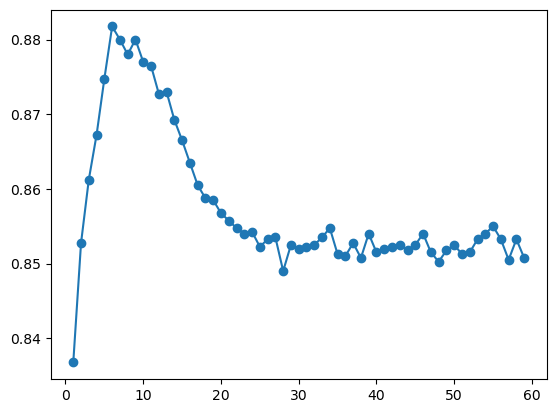

In [21]:
plt.plot(values, accuracy_scores, '-o')

## Publicando do modelo em produção

In [22]:
#modelo final treinado
dtc = tr.DecisionTreeClassifier( max_depth=6 )
dtc.fit(np.concatenate( (X_train, X_test) ),
        np.concatenate( (y_train, y_test) ))

#classificação sobre os dados de produção
y_pred = dtc.predict( X_prod )
acc = mt.accuracy_score(y_prod, y_pred)

print('Accuracy Over Preduction: {}'.format(acc))

Accuracy Over Preduction: 0.888


# Estratégia Treino-Validação-Teste

In [25]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = ms.train_test_split(X_test, y_test, test_size=0.5)

(2000, 2)

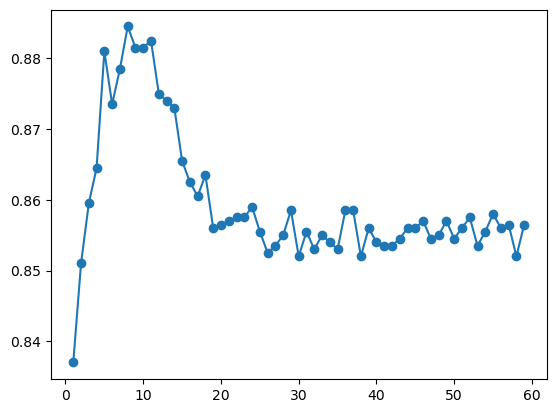

In [27]:
#treina sob os dados de treino e descobre os melhores parametros sob os dados de validação
values = list(range(1,60))
accuracy_scores = []
for i in values:
    dtc = tr.DecisionTreeClassifier( max_depth=i )
    dtc.fit( X_train, y_train )
    y_pred = dtc.predict( X_val )
    acc = mt.accuracy_score(y_val, y_pred)
    accuracy_scores.append(acc)
plt.plot(values, accuracy_scores, '-o')

In [30]:
#validando acurácia com o parametro max_depth = 8
dtc = tr.DecisionTreeClassifier( max_depth=8 )
dtc.fit(X_train, y_train)
y_pred = dtc.predict( X_val )
acc = mt.accuracy_score(y_val, y_pred)

print('Accuracy Over Preduction: {}'.format(acc))

Accuracy Over Preduction: 0.884


In [32]:
#Modelo treinado sob train+validation
dtc.fit(np.concatenate((X_train, X_val)),
        np.concatenate((y_train, y_val)))
y_pred = dtc.predict( X_test )
acc = mt.accuracy_score(y_test, y_pred)
print('Accuracy Over Test Data: {}'.format(acc))

Accuracy Over Test Data: 0.8865


In [35]:
# 0.8865 é a real métrica de acuracia do algoritimo para dados que ele nunca viu.
# É a métrica que deve ser informada para a equipe de negócios

In [34]:
#Modelo treinado sob train+validation
y_pred = dtc.predict( X_prod )
acc = mt.accuracy_score(y_prod, y_pred)
print('Accuracy Over Production Data: {}'.format(acc))

Accuracy Over Production Data: 0.89775


In [36]:
#Ajusta o último modelo para produção com todos os dados fornecidos.
dtc.fit(np.concatenate((X_train, X_val, X_test)),
        np.concatenate((y_train, y_val, y_test)))

DecisionTreeClassifier(max_depth=8)

In [37]:
#Após o modelo ir para produção ele pode ser reajustado ao longo do tempo a medida que novos dados são gerados.